## Project 4 - DATA 201/ DecisionTree Regression: Hye Young Park

In [411]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

### - Load the CSV File
- Referrence: "House Price" from Kaggle - https://www.kaggle.com/mahejabeen/house-price

### - Introduction
This dataset is about house_price in five regions in the USA as follows: North West, South West, North East, South East, and Central. Overall, we can check out the ratio of house_price in the five regions while we try to predict house_price based on this dataset.

### - Dataset Description (from the original dataset)
##### 1) cid: a notation for a house
##### 2) dayhours: Date house was sold
##### 3) price: Price is prediction target
##### 4) room_bed: Number of Bedrooms/House
##### 5) room_bath: Number of bathrooms/bedrooms
##### 6) living_measure: square footage of the home
##### 7) lot_measure: square footage of the lot
##### 8) ceil: Total floors (levels) in house
##### 9) coast: House which has a view to a waterfront
##### 10) sight: Has been viewed
##### 11) condition: How good the condition is (Overall)
##### 12) quality: grade given to the housing unit, based on grading system
##### 13) ceil_measure: square footage of house apart from basement
##### 14) basement_measure: square footage of the basement
##### 15) yr_built: Built Year
##### 16) yr_renovated: Year when house was renovated
##### 17) zipcode: zip
##### 18) lat: Latitude coordinate
##### 19) long: Longitude coordinate
##### 20) living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
##### 21) lot_measure15: lotSize area in 2015(implies-- some renovations)
##### 22) furnished: Based on the quality of room 23: total_area: Measure of both living and lot

### - Check the type of the dataset and information.

In [412]:
data = pd.read_csv('C:/Users/illya/Desktop/DATA 201 - Fall 2019/Project 4/House Price/innercityn.csv')
print(data.head())
print(data.tail())
type(data)
data.info()

          cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  yr_renovated  zipcode          City  \
0        13457   1.0      0      0  ...             0    98133       Seattle   
1         7500   1.0      0      0  ...             0    98023   Federal Way   
2         4324   2.0      0      0  ...             0    98038  Maple Valley   
3         3844   1.0      0      0  ...             0    98133       Seattle   
4         4050   1.0      0      0  ...             0    98115       Seattle   

       lat     long  living_measure15  lot_m

In [413]:
data.shape

(21613, 25)

### - Prepare and wrangle the dataset

In [414]:
# get rid of 'na'values and drop some columns that won't be used
data = data.dropna()
data.shape

(21613, 25)

In [415]:
data1 = data.drop(
    ['cid', 'dayhours', 'living_measure', 'lot_measure', 'zipcode', 
     'living_measure15', 'lot_measure15', 'lat', 'long', 'total_area'
    ], axis=1
)
data1.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,City,furnished,Region
0,808100,4,3.25,1.0,0,0,5,9,3020,0,1956,0,Seattle,1,North West
1,277500,4,2.50,1.0,0,0,3,8,1750,800,1976,0,Federal Way,0,South West
2,404000,3,2.50,2.0,0,0,3,8,2370,0,2006,0,Maple Valley,0,South East
3,300000,2,1.00,1.0,0,0,4,6,820,0,1916,0,Seattle,0,North West
4,699000,2,1.50,1.0,0,0,4,8,1400,0,1954,0,Seattle,0,North West


In [416]:
#check average of house price for fun
newarr = data1[
    ['price']
].to_numpy()

data_ave = np.average(
    newarr
)
print(data_ave)

540182.1587933188


In [417]:
#change the order of dataset columns
data1 = data1.reindex(
    columns = ['price', 'Region', 'room_bed', 'room_bath', 
               'condition', 'yr_built','yr_renovated', 
               'coast', 'sight', 'furnished' 
    ])
data1.head(15)

,price,Region,room_bed,room_bath,condition,yr_built,yr_renovated,coast,sight,furnished
0,808100,North West,4,3.25,5,1956,0,0,0,1
1,277500,South West,4,2.50,3,1976,0,0,0,0
2,404000,South East,3,2.50,3,2006,0,0,0,0
3,300000,North West,2,1.00,4,1916,0,0,0,0
4,699000,North West,2,1.50,4,1954,0,0,0,0
5,585000,Central,3,2.50,4,1989,0,0,0,1
6,465000,North West,3,1.75,3,1954,0,0,0,0
7,480000,North West,3,1.50,4,1949,0,0,0,0
8,780000,North West,4,2.00,3,1953,0,0,2,0
9,215000,South West,4,1.00,4,1969,0,0,0,0


### - Visualize the data

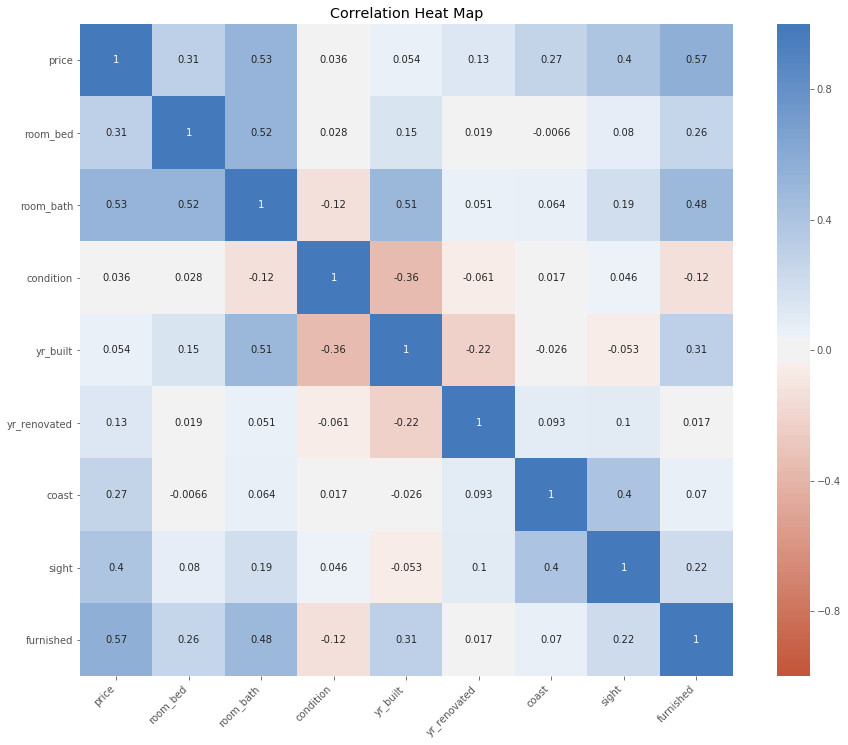

In [418]:
# check the correlation between variables
corr = data1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    annot=True,
    square=True
)
ax.figure.set_size_inches(16, 12)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heat Map')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


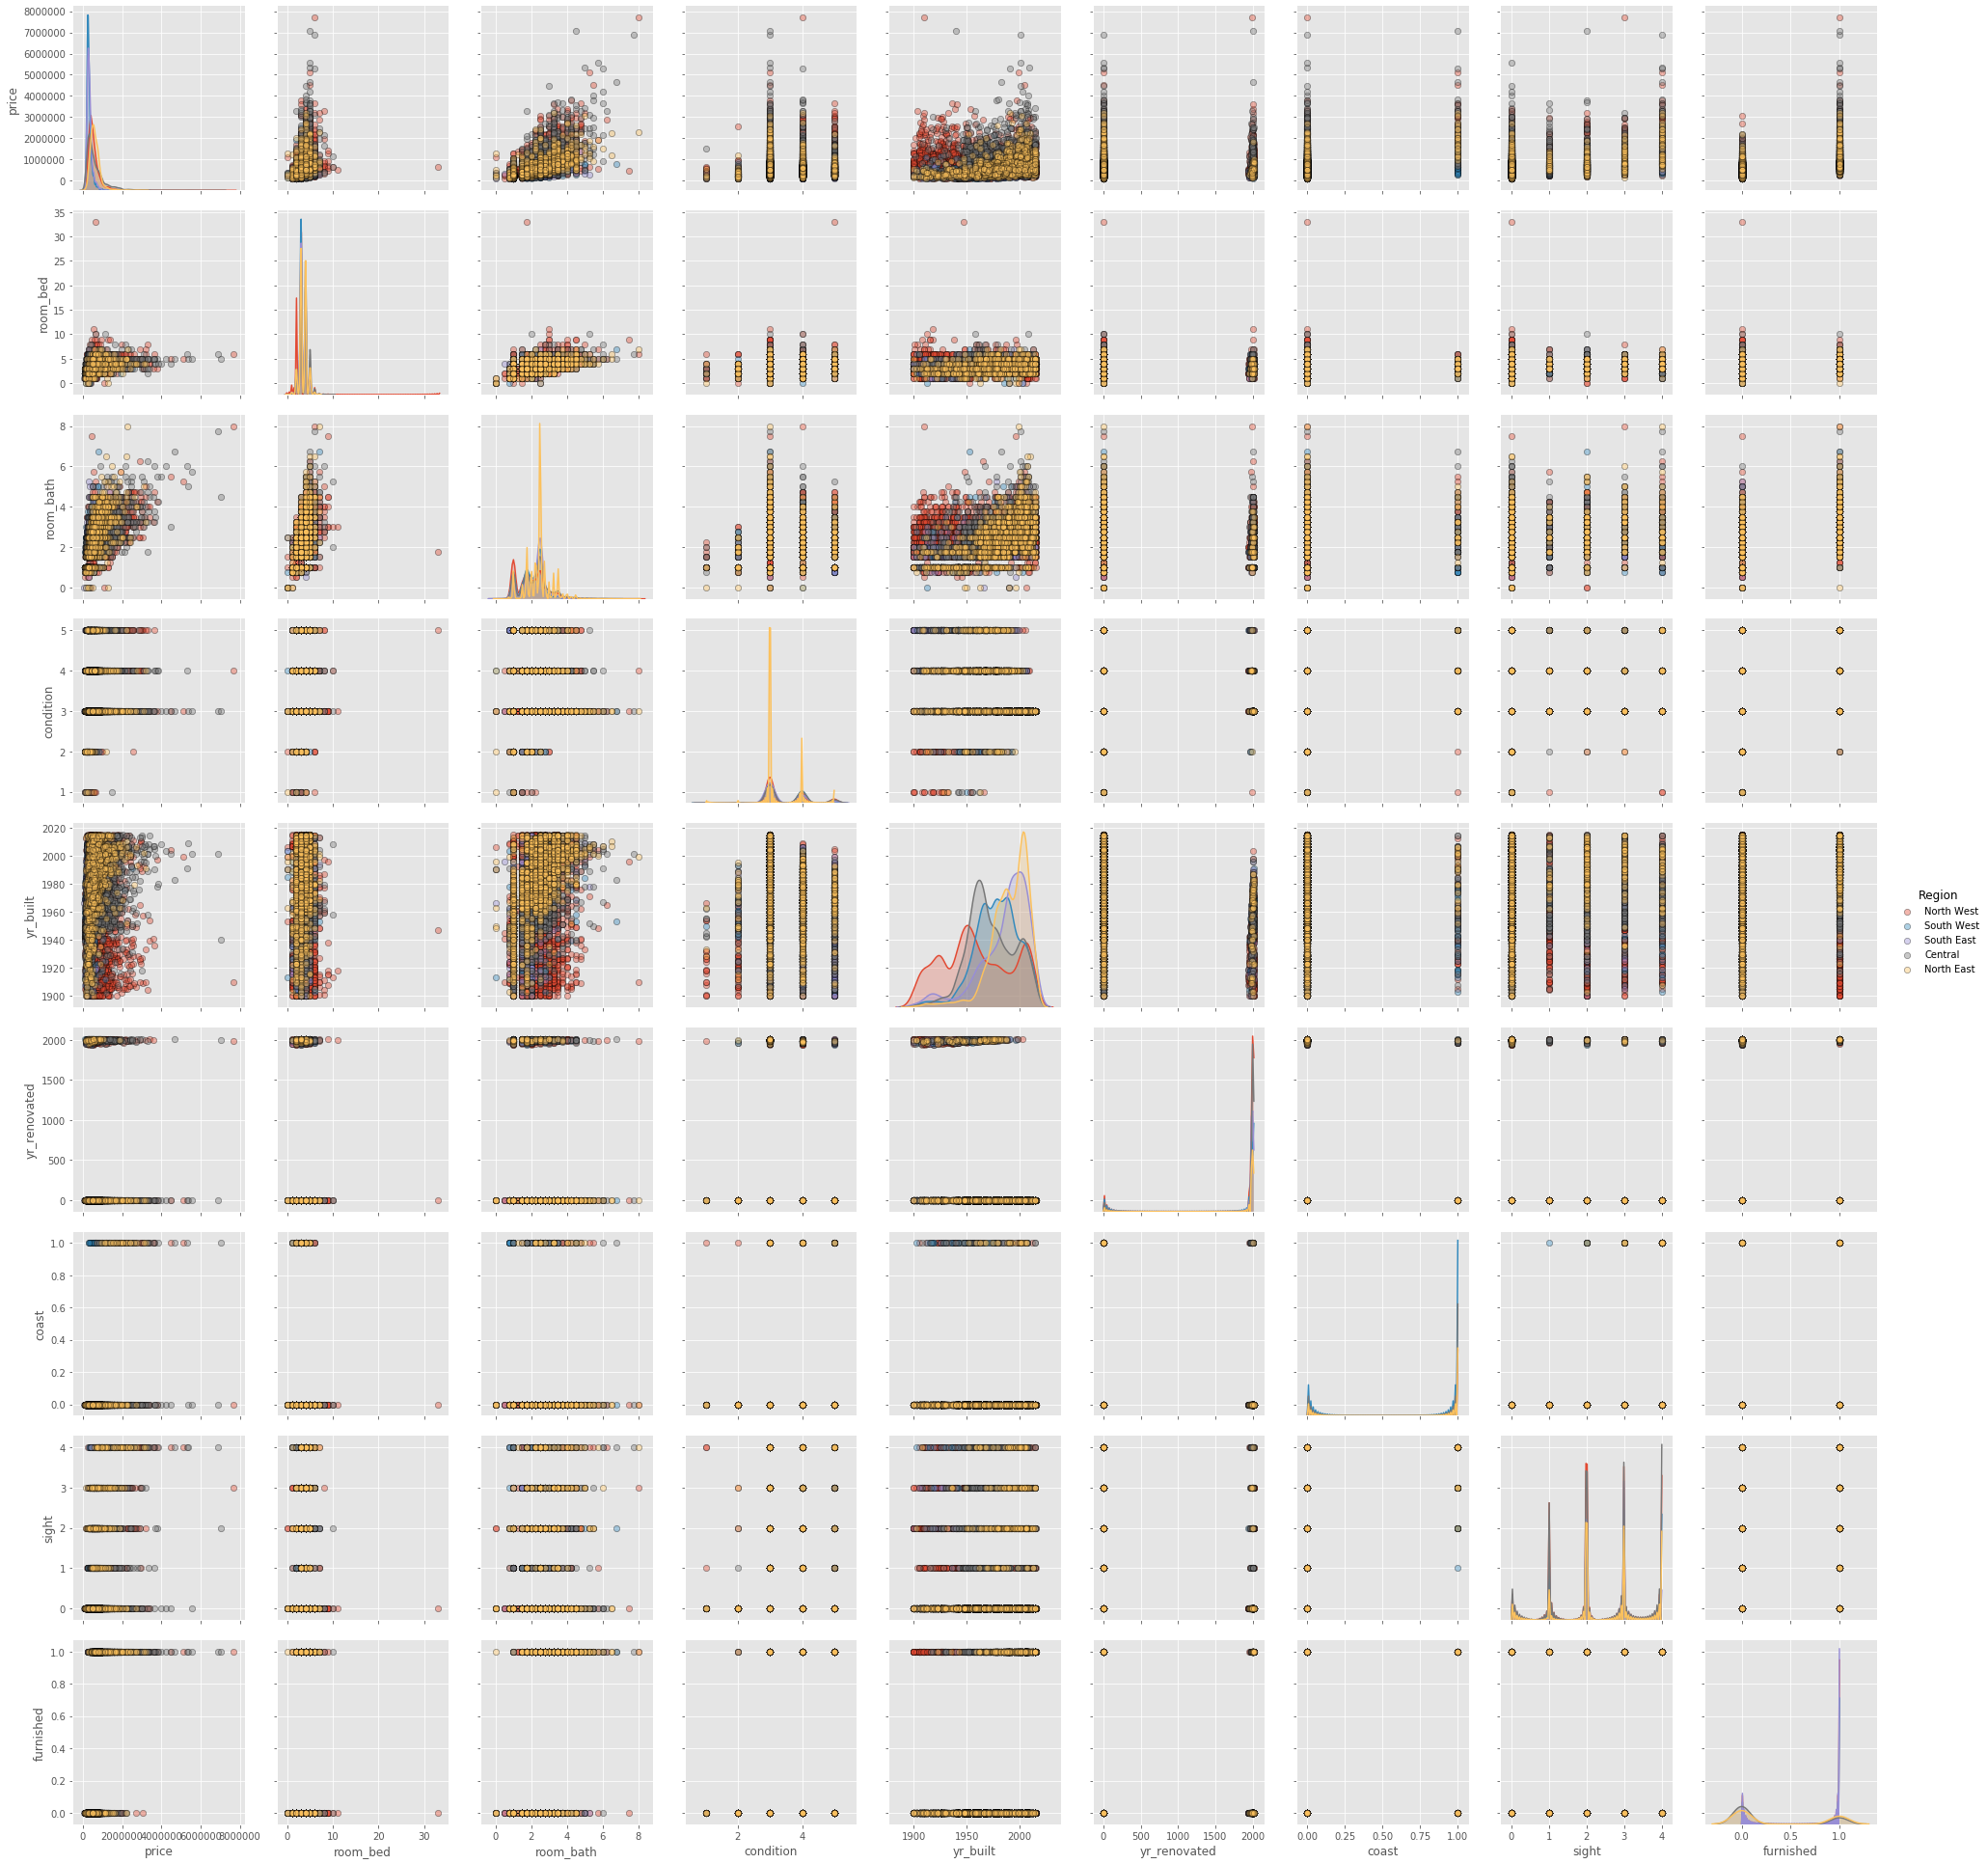

In [419]:
sns.pairplot(data1, hue = 'Region', diag_kind = 'kde',
             plot_kws = {'alpha': 0.4, 's': 40, 'edgecolor': 'k'},
             height = 3)

In [420]:
#encode categorical variable in order to use 'Region' as integer in model training
for i in data1.index:
    if data1.at[i, 'Region'] == 'North West':
        data1.at[i, 'Region'] = 1
    elif data1.at[i, 'Region'] == 'South West':
        data1.at[i, 'Region'] = 2
    elif data1.at[i, 'Region'] == 'North East':
        data1.at[i, 'Region'] = 3
    elif data1.at[i, 'Region'] == 'South East':
        data1.at[i, 'Region'] = 4
    elif data1.at[i, 'Region'] == 'Central':
        data1.at[i, 'Region'] = 5
    else:
         ;
data1.head(10)

,price,Region,room_bed,room_bath,condition,yr_built,yr_renovated,coast,sight,furnished
0,808100,1,4,3.25,5,1956,0,0,0,1
1,277500,2,4,2.50,3,1976,0,0,0,0
2,404000,4,3,2.50,3,2006,0,0,0,0
3,300000,1,2,1.00,4,1916,0,0,0,0
4,699000,1,2,1.50,4,1954,0,0,0,0
5,585000,5,3,2.50,4,1989,0,0,0,1
6,465000,1,3,1.75,3,1954,0,0,0,0
7,480000,1,3,1.50,4,1949,0,0,0,0
8,780000,1,4,2.00,3,1953,0,0,2,0
9,215000,2,4,1.00,4,1969,0,0,0,0


- Density Plot

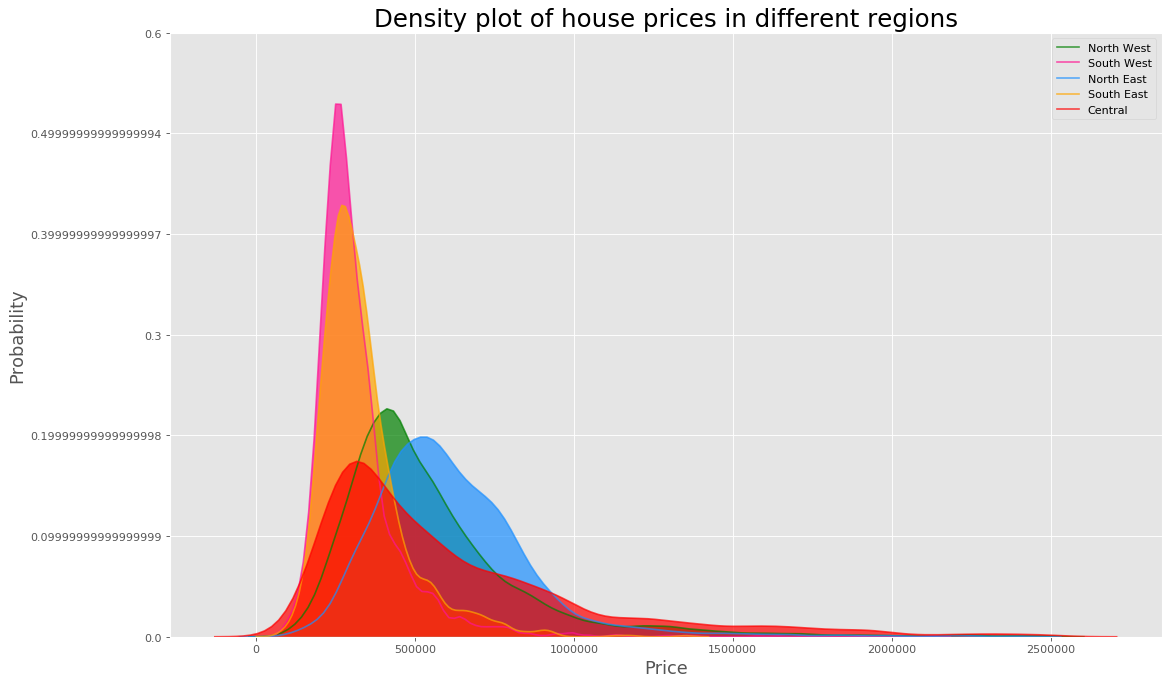

In [421]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)

# Make new dataset to get rid of outliers for graph (for better visualization)
data_without_outlier = data1[data1['price'] <= 2500000]

fig = sns.kdeplot(data_without_outlier.loc[data1['Region'] == 1, "price"], 
                  shade=True, color="g", label="North West", alpha=.7
                 )
fig = sns.kdeplot(data_without_outlier.loc[data1['Region'] == 2, "price"], 
                  shade=True, color="deeppink", label="South West", alpha=.7
                 )
fig = sns.kdeplot(data_without_outlier.loc[data1['Region'] == 3, "price"], 
                  shade=True, color="dodgerblue", label="North East", alpha=.7
                 )
fig = sns.kdeplot(data_without_outlier.loc[data1['Region'] == 4, "price"], 
                  shade=True, color="orange", label="South East", alpha=.7
                 )
fig = sns.kdeplot(data_without_outlier.loc[data1['Region'] == 5, "price"], 
                  shade=True, color="red", label="Central", alpha=.7
                 )
plt.yticks(fig.get_yticks(), 
           fig.get_yticks() * 100000
          )
plt.ylabel('Probability', fontsize=16)
plt.xlabel('Price', fontsize=16)

# Decoration
plt.title('Density plot of house prices in different regions', fontsize=22)
plt.legend()
plt.show()

### - Train, test, and split the dataset

In [422]:
#Seperating the Target variable: X=data, Y=target(answer)
X = data1.values[:, 1:6]
Y = data1.values[:, 0].astype('int')

In [423]:
#spliting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.3,
    random_state = 100
)


### - Training/model fitting

In [424]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

reg_data = DecisionTreeRegressor(
    random_state = 100,
    max_depth=3, min_samples_leaf=5
)
# Fit 'reg_data' to the training set
reg_data.fit(
    X_train, y_train
)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

### - Model parameters study

In [425]:
from sklearn.metrics import mean_squared_error, r2_score

model_score = reg_data.score(X_train, y_train)

# Have a look at R sq to give an idea of the fit
print('coefficient of determination R^2 of the prediction.: ',
      model_score
     )
y_predicted = reg_data.predict(X_test)

# The mean squared error
print("Test mean squared error: %.2f"% mean_squared_error(
    y_test, y_predicted)
     )

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))


coefficient of determination R^2 of the prediction.:  0.3787032095966686
Test mean squared error: 86349098862.74
Test Variance score: 0.31


In [426]:
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(reg_data, X_train, y_train, cv= 10, scoring='neg_mean_squared_error',n_jobs = -1)

# Predict the labels of training set
y_predict_train = reg_data.predict(X_train)

# Predict the labels of test set
y_predict_test = reg_data.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))


CV MSE: 90853204765.68
Train MSE: 86296692077.37
Test MSE: 86349098862.74


### - Accuracy report with test data :
Looks like our model has an accuracy rate of 31%. It's possible the weak correlation between price and our variables in the heat map has an effect on this.
The Mean Square Error is quite large, but perhaps that is because we are dealing with very large numbers, hundreds of thousands to millions.

In [427]:
score = reg_data.score(X_test, y_test)

print ('Regression Score: ', score) 

Regression Score:  0.3132441749479361


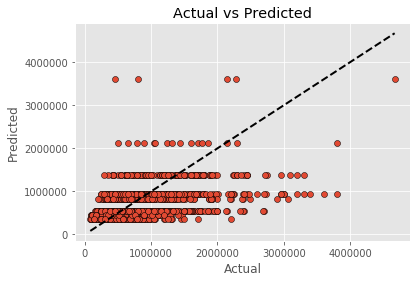

In [428]:
# So let's run the model against the test data and plot it
from sklearn.model_selection import cross_val_predict

fig, data_val = plt.subplots()
data_val.scatter(y_test, 
           y_predicted, 
           edgecolors=(0, 0, 0)
          )
data_val.plot([y_test.min(), y_test.max()],
              [y_test.min(), y_test.max()],
              'k--', lw=2
             )
data_val.set_xlabel('Actual')
data_val.set_ylabel('Predicted')
data_val.set_title("Actual vs Predicted")
plt.show()

[Text(167.4, 190.26, 'X[2] <= 3.125\nentropy = 138897694966.93\nsamples = 15129\nvalue = 540216.885'),
 Text(83.7, 135.9, 'X[2] <= 2.125\nentropy = 67378333419.933\nsamples = 13826\nvalue = 486794.237'),
 Text(41.85, 81.53999999999999, 'X[0] <= 1.5\nentropy = 37716710971.069\nsamples = 7282\nvalue = 408583.589'),
 Text(20.925, 27.180000000000007, 'entropy = 33527375370.06\nsamples = 4133\nvalue = 454015.793'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 36950458470.486\nsamples = 3149\nvalue = 348954.724'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 1957.5\nentropy = 86003937202.17\nsamples = 6544\nvalue = 573825.095'),
 Text(104.625, 27.180000000000007, 'entropy = 170142465826.588\nsamples = 689\nvalue = 831468.274'),
 Text(146.475, 27.180000000000007, 'entropy = 67372112160.897\nsamples = 5855\nvalue = 543506.367'),
 Text(251.10000000000002, 135.9, 'X[2] <= 4.625\nentropy = 546166230434.298\nsamples = 1303\nvalue = 1107079.149'),
 Text(209.25, 81.5399999999999

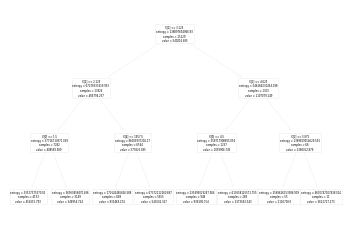

In [429]:
tree.plot_tree(reg_data)

In [430]:
# import export_graphviz 
from sklearn.tree import export_graphviz  

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(reg_data, out_file ='tree.dot',feature_names = ['Region','room_bed', 'room_bath','condition','yr_built'])


The tree is finally exported and shown in the TREE STRUCTURE below, visualized using
 http://www.webgraphviz.com/ by copying the data from the ‘tree.dot’ file.

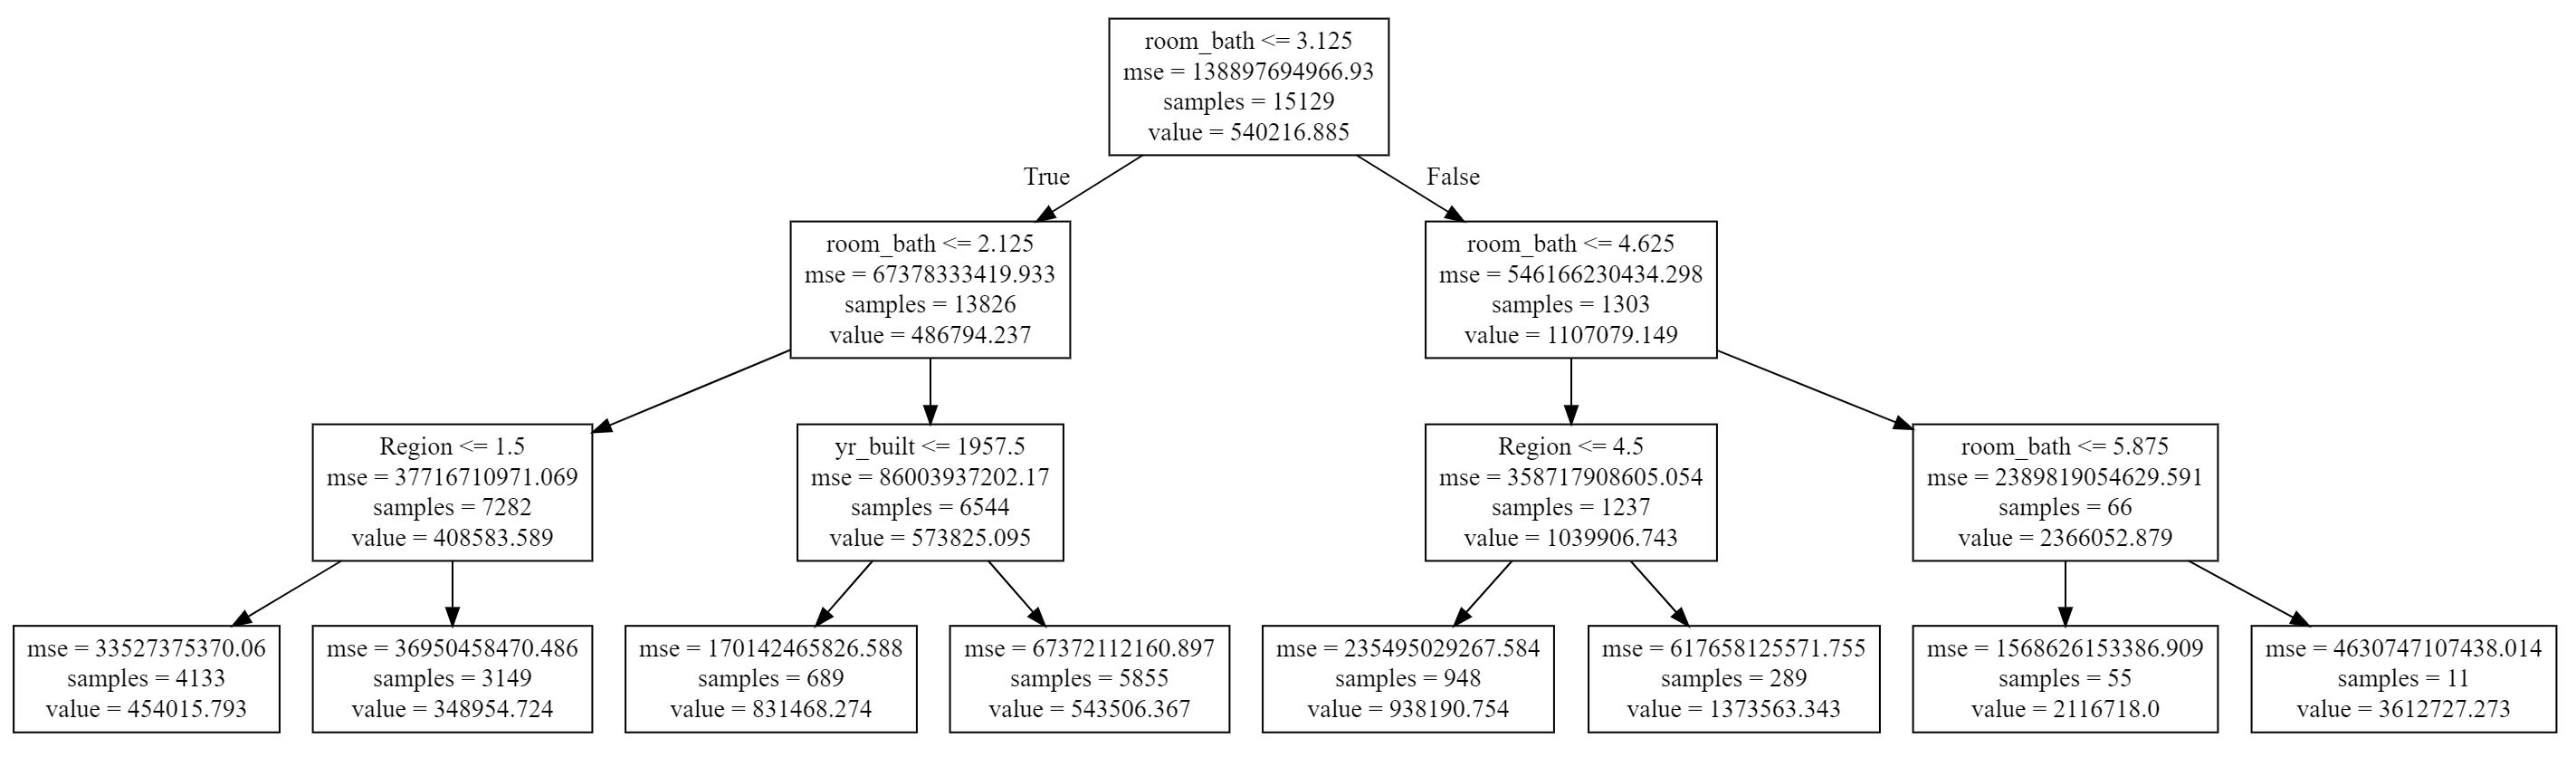

The decision tree algorithm looks at room bath in the first and second layers, then region/yr_build/room_bath again in the 3rd layer and tries to predict the value based on the answers.
One chain is:
Less than 3.125 baths ->
More than 2.125 baths -> 
Built after 1957.5 ->
Predicted Price Value is $543506

### - Summary

The goal of this project was to try and predict the price of a house based on other categorical variables in the dataset. The variables were region, yr_built, room_bed, room_bath, and condition. 
We discovered that the correlation between price and these variables was somewhat low (~0.57) and I knew the model would probably produce inaccurate results. As expected, our model was about 31% accurate, which means the correlation of the data is not very good for this type of model.